In [22]:
import pandas as pd
import seaborn as sns

In [23]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일 ,시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [24]:
# 컬럼의 이름을 변경
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일' ,'시간', '인원']

In [25]:
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
# 반올림하는 함수 =  round
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)

In [27]:
tips[['총금액', '팁']]

,총금액,팁
0,17.0,1.0
1,10.3,1.7
2,21.0,3.5
3,23.7,3.3
4,24.6,3.6
...,...,...
239,29.0,5.9
240,27.2,2.0
241,22.7,2.0
242,17.8,1.8


In [28]:
# 팁의 비율 파생변수 생성
# 팁 / 총금액 * 100
tips['팁 비율'] = tips['팁'] / tips['총금액']*100

In [29]:
tips.head(1)

,총금액,팁,성별,흡연여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353


In [30]:
# 그룹화
group_data = tips[['인원', '성별', '팁 비율']].groupby(['인원','성별']).mean()
group_data

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [31]:
# tips.groupby(['인원', '성별'])['팁'].mean() / tips['총금액'].mean()

In [32]:
# 시각화
import matplotlib.pyplot as plt

In [33]:
# 맥에서 matplotlib 폰트 설정 변경
plt.rc('font', family = 'AppleGothic')

<Axes: xlabel='인원,성별'>

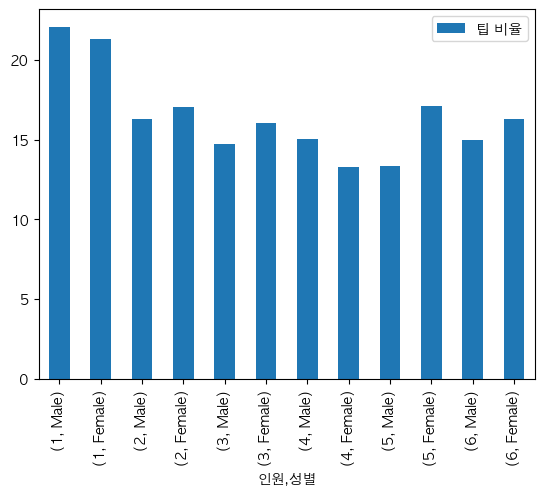

In [34]:
group_data.plot.bar()

In [35]:
import platform

In [36]:
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin": # 맥인경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [37]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

<function matplotlib.pyplot.show(close=None, block=None)>

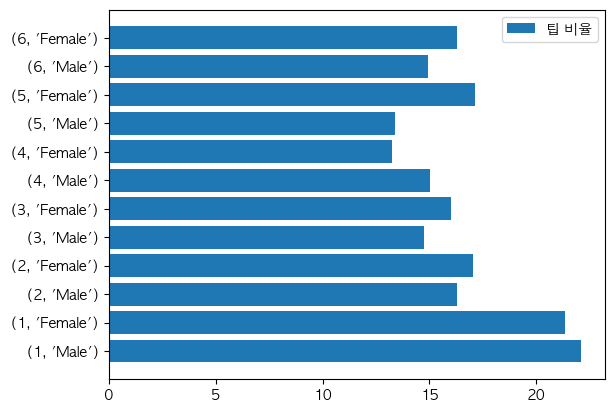

In [38]:
x =  list(range(0, len(group_data.index), 1))
y = group_data['팁 비율']

# print(x)
# print(y)
plt.barh(x, y, label = '팁 비율')
plt.yticks(x, group_data.index) # xticks = x를 바꿔주겠다, yticks = y를 바꿔주겠다
plt.legend()
plt.show

In [39]:
group_data

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [40]:
# 남자의 데이터프레임
# 여자의 데이터프레임으로 나눈다
Male_data = pd.DataFrame()
Female_data =  pd.DataFrame()

for i in group_data.index:
    if i[1] == 'Male':
        Male_data = pd.concat([Male_data, group_data.loc[[i]]])
    else:
        Female_data = pd.concat([Female_data, group_data.loc[[i]]])

In [41]:
group_data.loc[[(1, "Female")]]

,,팁 비율
인원,성별,
1,Female,21.322912


In [42]:
Male_data

,,팁 비율
인원,성별,
1,Male,22.093023
2,Male,16.273796
3,Male,14.763093
4,Male,15.017047
5,Male,13.371547
6,Male,14.953486


In [43]:
list(range(2, len(female_data)*2, 2))

NameError: name 'female_data' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

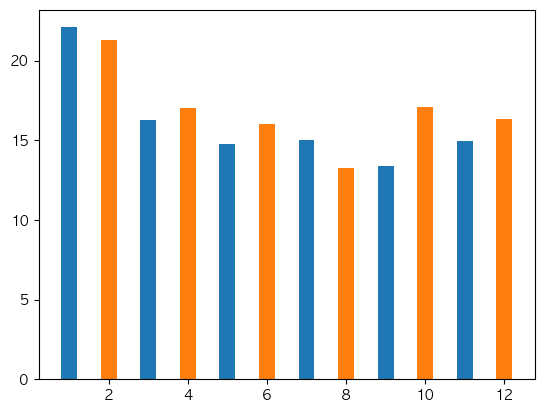

In [ ]:
# 그래프 만들기
x = list(range(1, (len(Male_data))*2, 2))
y = Male_data['팁 비율']
x2 =  list(range(2, (len(Female_data)+1)*2, 2))
y2  = Female_data['팁 비율']
plt.bar(x, y, width = 0.4)
plt.bar(x2, y2, width = 0.4)
plt.show

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

In [ ]:
# 위에꺼를 간편하게 만들수 있음
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    values = '팁 비율',
    aggfunc = 'mean'
)

<Axes: xlabel='인원'>

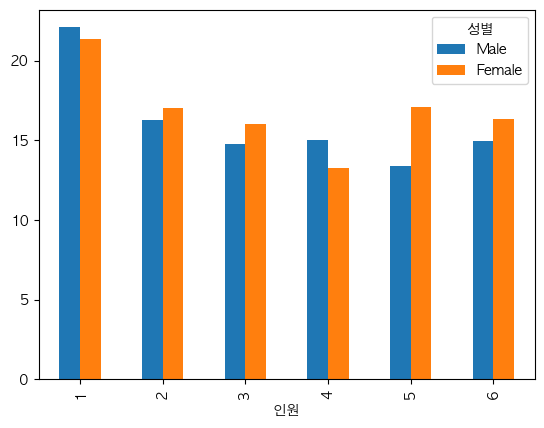

In [ ]:
pivot_data.plot.bar()